In [1]:

import os
import pathlib
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

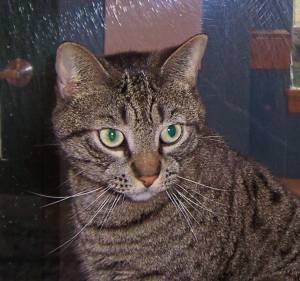

In [2]:
src_img = Image.open('data/train/Cat/1.jpg')
display(src_img)

In [3]:
np, np.array(src_img).shape

(<module 'numpy' from 'C:\\Users\\ponhr\\AppData\\Roaming\\Python\\Python310\\site-packages\\numpy\\__init__.py'>,
 (281, 300, 3))

In [4]:
281* 300 * 3

252900

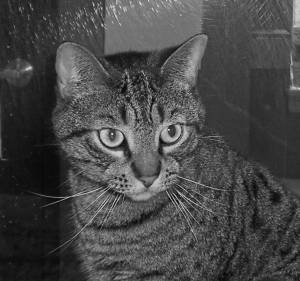

In [5]:
gray_img = ImageOps.grayscale(src_img)
display(gray_img)

In [6]:
np.array(gray_img).shape

(281, 300)

In [7]:
281 * 300

84300

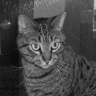

In [8]:
gray_resized_img = gray_img.resize(size=(96, 96))
display(gray_resized_img)

In [9]:
96 * 96

9216

In [10]:
np.ravel(gray_resized_img)

array([42, 42, 51, ..., 68, 37, 36], dtype=uint8)

In [11]:
img_final = np.ravel(gray_resized_img) / 255.0
img_final

array([0.16470588, 0.16470588, 0.2       , ..., 0.26666667, 0.14509804,
       0.14117647])

In [12]:
def process_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(96, 96))
    img = np.ravel(img) / 255.0
    return img

In [13]:
test_img = process_image(img_path='data/train/Dog/10012.jpg')
test_img 

array([0.24705882, 0.23921569, 0.29019608, ..., 0.19215686, 0.20784314,
       0.23921569])

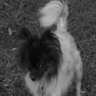

In [14]:
Image.fromarray(np.uint8(test_img * 255).reshape((96, 96)))

In [15]:
def process_folder(folder: pathlib.PosixPath) -> pd.DataFrame:
    # We'll store the images here
    processed = []
    
    # For every image in the directory
    for img in folder.iterdir():
        # Ensure JPG
        if img.suffix == '.jpg':
            # Two images failed for whatever reason, so let's just ignore them
            try:
                processed.append(process_image(img_path=str(img)))
            except Exception as _:
                continue
           
    # Convert to pd.DataFrame
    processed = pd.DataFrame(processed)
    # Add a class column - dog or a cat
    processed['class'] = folder.parts[-1]
    
    return processed

In [16]:
# Training set
train_cat = process_folder(folder=pathlib.Path.cwd().joinpath('data/train/Cat'))
train_dog = process_folder(folder=pathlib.Path.cwd().joinpath('data/train/Dog'))
train_set = pd.concat([train_cat, train_dog], axis=0)

with open('train_set.pkl', 'wb') as f:
    pickle.dump(train_set, f)

In [17]:
# Test set
test_cat = process_folder(folder=pathlib.Path.cwd().joinpath('data/test/Cat'))
test_dog = process_folder(folder=pathlib.Path.cwd().joinpath('data/test/Dog'))
test_set = pd.concat([test_cat, test_dog], axis=0)

with open('test_set.pkl', 'wb') as f:
    pickle.dump(test_set, f)

In [18]:
# Validation set 
valid_cat = process_folder(folder=pathlib.Path.cwd().joinpath('data/validation/Cat'))
valid_dog = process_folder(folder=pathlib.Path.cwd().joinpath('data/validation/Dog'))
valid_set = pd.concat([valid_cat, valid_dog], axis=0)

with open('valid_set.pkl', 'wb') as f:
    pickle.dump(valid_set, f)

In [19]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.662745,0.678431,0.698039,0.713725,0.725490,0.737255,0.749020,0.760784,0.772549,0.780392,...,0.007843,0.011765,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,Cat
1,0.164706,0.164706,0.200000,0.168627,0.180392,0.160784,0.168627,0.156863,0.172549,0.184314,...,0.188235,0.207843,0.219608,0.215686,0.250980,0.286275,0.266667,0.145098,0.141176,Cat
2,0.133333,0.125490,0.172549,0.176471,0.180392,0.211765,0.223529,0.219608,0.215686,0.215686,...,0.631373,0.596078,0.513725,0.509804,0.556863,0.611765,0.658824,0.670588,0.603922,Cat
3,0.870588,0.874510,0.870588,0.886275,0.894118,0.882353,0.894118,0.909804,0.898039,0.894118,...,0.854902,0.796078,0.800000,0.803922,0.835294,0.866667,0.850980,0.831373,0.835294,Cat
4,0.435294,0.458824,0.494118,0.345098,0.274510,0.415686,0.533333,0.545098,0.713725,0.580392,...,0.364706,0.384314,0.368627,0.368627,0.450980,0.396078,0.349020,0.364706,0.325490,Cat


In [20]:
train_set = shuffle(train_set).reset_index(drop=True)
valid_set = shuffle(valid_set).reset_index(drop=True)

In [21]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,9207,9208,9209,9210,9211,9212,9213,9214,9215,class
0,0.972549,0.831373,1.000000,1.000000,1.000000,1.000000,0.905882,0.870588,1.000000,1.000000,...,0.749020,0.756863,0.788235,0.749020,0.729412,0.749020,0.752941,0.776471,0.756863,Cat
1,0.360784,0.301961,0.607843,0.662745,0.666667,0.682353,0.690196,0.694118,0.705882,0.701961,...,0.537255,0.513725,0.501961,0.494118,0.486275,0.482353,0.470588,0.458824,0.447059,Dog
2,0.262745,0.392157,0.670588,0.631373,0.603922,0.603922,0.623529,0.627451,0.619608,0.658824,...,0.211765,0.309804,0.392157,0.462745,0.321569,0.317647,0.298039,0.325490,0.368627,Dog
3,0.274510,0.286275,0.298039,0.298039,0.298039,0.294118,0.274510,0.274510,0.290196,0.286275,...,0.654902,0.752941,0.682353,0.600000,0.615686,0.678431,0.678431,0.631373,0.662745,Dog
4,0.501961,0.509804,0.533333,0.533333,0.513725,0.505882,0.509804,0.509804,0.513725,0.517647,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Dog


In [22]:

X_train = train_set.drop('class', axis=1)
y_train = train_set['class']

X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

X_valid = valid_set.drop('class', axis=1)
y_valid = valid_set['class']

In [23]:

y_train.factorize()

(array([0, 1, 1, ..., 1, 1, 0], dtype=int64),
 Index(['Cat', 'Dog'], dtype='object'))

In [24]:
y_train = tf.keras.utils.to_categorical(y_train.factorize()[0], num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test.factorize()[0], num_classes=2)
y_valid = tf.keras.utils.to_categorical(y_valid.factorize()[0], num_classes=2)

In [25]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [26]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)


Epoch 1/100

196/196 [==============================] - 108s 528ms/step - loss: 0.9830 - accuracy: 0.5348 - val_loss: 0.6721 - val_accuracy: 0.5827
Epoch 2/100
196/196 [==============================] - 89s 453ms/step - loss: 0.6710 - accuracy: 0.5862 - val_loss: 0.6619 - val_accuracy: 0.5999
Epoch 3/100
196/196 [==============================] - 86s 441ms/step - loss: 0.6620 - accuracy: 0.6009 - val_loss: 0.6500 - val_accuracy: 0.6172
Epoch 4/100
196/196 [==============================] - 68s 346ms/step - loss: 0.6552 - accuracy: 0.6107 - val_loss: 0.6522 - val_accuracy: 0.6156
Epoch 5/100
196/196 [==============================] - 61s 310ms/step - loss: 0.6533 - accuracy: 0.6120 - val_loss: 0.6452 - val_accuracy: 0.6231
Epoch 6/100
196/196 [==============================] - 61s 312ms/step - loss: 0.6503 - accuracy: 0.6161 - val_loss: 0.6546 - val_accuracy: 0.6094
Epoch 7/100
196/196 [==============================] - 61s 309ms/step - loss: 0.6482 - accuracy: 0.6218 - val_loss: 0.642